# Theoretical Foundations of Buffer Stock Saving

<cite data-cite="6202365/8AH9AXN2"></cite>


[![econ-ark.org](https://img.shields.io/badge/Powered%20by-Econ--ARK-3e8acc.svg)](https://econ-ark.org/materials/BufferStockTheory)


<a id='interactive-dashboard'></a>

[This notebook](https://econ-ark.org/BufferStockTheory/#launch) uses the [Econ-ARK/HARK](https://github.com/econ-ark/HARK) toolkit to reproduce and illustrate key results of the paper [Theoretical Foundations of Buffer Stock Saving](http://econ-ark.github.io/BufferStockTheory/BufferStockTheory).

An [interactive dashboard](https://econ-ark.org/BufferStockStockTheory/#Dashboard) allows you to modify parameters to see how the figures change.

- JupyterLab, click on the $\bullet$$\bullet$$\bullet$ patterns to expose the runnable code
- in either a Jupyter notebook or JupyterLab, click a double triangle to execute the code and generate the figures

`# Setup Python Below`

In [4]:
# This cell does some setup

# Import required python packages
import logging
import numpy as np
from copy import deepcopy
import warnings

# Ignore some harmless but alarming warning messages
warnings.filterwarnings("ignore")

# Plotting tools
import matplotlib.pyplot as plt

# Make required tools are installed
import os.path
import sys
import subprocess
if os.path.isdir('binder'):  # Folder defining requirements exists
    # File requirements.out should be created first time notebook is run
    if not os.path.isfile('./binder/requirements.out'):
        try:
            output = subprocess.check_output(
                [sys.executable, '-m', 'pip', 'install','--user','-r','./binder/requirements.txt'],stderr=subprocess.STDOUT) 
            requirements_out = open("./binder/requirements.out","w")
            requirements_out.write(output.decode("utf8"))
        except subprocess.CalledProcessError as e:
            print(output.decode("utf8"))
            print(e.output.decode("utf8"),e.returncode)

\begin{eqnarray}
\aLev_{t}   &=&\mLev_{t}-\cLev_{t}. \notag
\end{eqnarray}

The consumer's __**p**__ermanent noncapital income $\pLev$ grows by a predictable factor $\PermGroFac$ and is subject to an unpredictable multiplicative shock $\Ex_{t}[\permShk_{t+1}]=1$,

\begin{eqnarray}
\pLev_{t+1} & = & \pLev_{t} \PermGroFac \permShk_{t+1}, \notag
\end{eqnarray}

and, if the consumer is employed, actual income is permanent income multiplied by a transitory shock $\tranShk^{\large e}$.  There is also a probability $\UnempPrb$ that the consumer will be temporarily unemployed and experience income of $\tranShk^{\large u}  = 0$.  We construct $\tranShk^{\large e}$ so that its mean value is $1/(1-\UnempPrb)$ because in that case the mean level of the transitory shock (accounting for both unemployed and employed states) is exactly

\begin{eqnarray}
\Ex_{t}[\tranShk_{t+1}] & = & \tranShk^{\large{u}}  \times \UnempPrb + (1-\UnempPrb) \times \Ex_{t}[\tranShk^{\large{e}}_{t+1}] \notag
\\ & = & 0 \times \UnempPrb + (1-\UnempPrb) \times 1/(1-\UnempPrb)  \notag
\\ & = & 1. \notag
\end{eqnarray}

  We can combine the unemployment shock $\tranShk^{\large u}$ and the transitory shock to employment income $\tranShk^{\large e}$ into $\tranShk _{t+1}$, so that next period's market resources are
\begin{eqnarray}
    \mLev_{t+1} &=& \aLev_{t}\Rfree +\pLev_{t+1}\tranShk_{t+1}.  \notag
\end{eqnarray}

When the consumer has a CRRA utility function $u(\cLev)=\frac{\cLev^{1-\CRRA}}{1-\CRRA}$, the paper shows that the problem can be written in terms of ratios (nonbold font) of level (bold font) variables to permanent income, e.g. $m_{t} \equiv \mLev_{t}/\pLev_{t}$, and the Bellman form of [the problem reduces to](https://econ-ark.github.io/BufferStockTheory/#The-Related-Problem):

\begin{eqnarray*}
v_t(m_t) &=& \max_{c_t}~~ u(c_t) + \DiscFac~\Ex_{t} [(\PermGroFac\permShk_{t+1})^{1-\CRRA} v_{t+1}(m_{t+1}) ] \\
& s.t. & \\
a_t &=& m_t - c_t \\
m_{t+1} &=& a_t \Rfree/(\PermGroFac \permShk_{t+1}) + \tranShk_{t+1} \\
\end{eqnarray*}

In [2]:
# Set the parameters for the baseline results in the paper
base_params['PermGroFac'] = [1.03]  # Permanent income growth factor
base_params['Rfree'] = Rfree = 1.04  # Interest factor on assets
base_params['DiscFac'] = DiscFac = 0.96  # Time Preference Factor
base_params['CRRA'] = CRRA = 2.00  # Coefficient of relative risk aversion
# Probability of unemployment (e.g. Probability of Zero Income in the paper)
base_params['UnempPrb'] = UnempPrb = 0.005
base_params['IncUnemp'] = IncUnemp = 0.0   # Induces natural borrowing constraint
base_params['permShkStd'] = [0.1]   # Standard deviation of log permanent income shocks
base_params['tranShkStd'] = [0.1]   # Standard deviation of log transitory income shocks

NameError: name 'base_params' is not defined

`# Plot the consumption rules:`

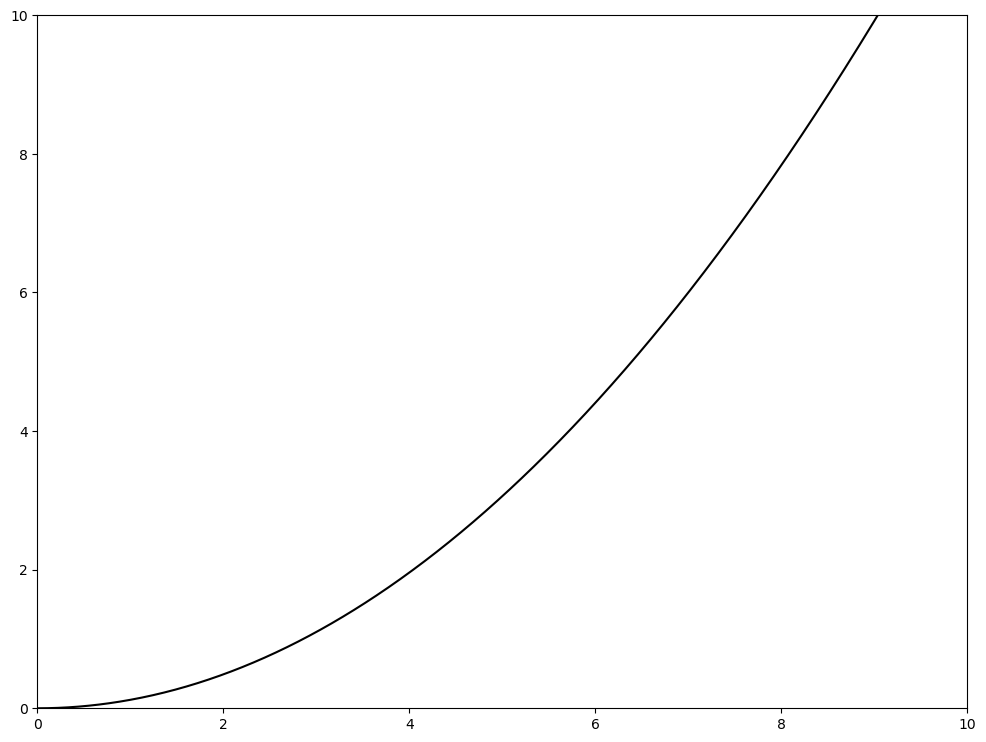

In [16]:
# Plot the different consumption rules for the different periods

mPlotMin = 0
mLocCLabels = 9.6  # Defines horizontal limit of figure
mPlotTop = 10   # Defines maximum m value where functions are plotted
mPts = 1000      # Number of points at which functions are evaluated

mBelwLabels = np.linspace(mPlotMin, mLocCLabels-0.1, mPts)  # Range of m below loc of labels
m_FullRange = np.linspace(mPlotMin, mPlotTop, mPts)        # Full plot range
# c_Tm0  defines the last period consumption rule (c=m)

base = np.linspace(0, 3.5, mPts)
Func = np.square(base)

plt.figure(figsize=(12, 9))


xMin, xMax = 0, 10
yMin, yMax = 0, 10
plt.xlim(xMin, xMax)
plt.ylim(yMin, yMax)



plt.plot(m_FullRange, Func, color='black')

plt.show()
# Save the figure

makeFig('DLOTestFig')  # Comment out if you want to run uninterrupted


The paper [shows](https://econ-ark.github.io/BufferStockTheory/#Autarky-Value) that a consumer who planned to spend his permanent income $\{ \pLev_{t}, \pLev_{t+1}, ...\} $ in every period would have value defined by

\begin{equation*}
\vLev_{t}^{\text{autarky}} = \uFunc(\pLev_{t})\left(\frac{1}{1-\DiscFac \PermGroFac^{1-\CRRA} \Ex[\permShk^{1-\CRRA}]}\right)
\end{equation*}

and defines the ['Finite Value of Autarky Condition'](https://econ-ark.github.io/BufferStockTheory/#Autarky-Value) as the requirement that the denominator be a positive finite number:

\begin{equation*}
\DiscFac \PermGroFac^{1-\CRRA} \Ex[\permShk^{1-\CRRA}] < 1
\end{equation*}

For $\mNrm$ things are slightly more complicated:
\begin{eqnarray*}
\Ex_{t}[m_{t+1}]
& = & \Ex_{t}\left[(m_{t}-c_{t})(\Rfree/(\permShk_{t+1}\PermGroFac)) +\tranShk_{t+1}\right]\\
& = & a_{t}\Rfree\Ex_{t}\left[(\permShk_{t+1}\PermGroFac)^{-1}\right] +1 \\
\Ex_{t}\left[\frac{m_{t+1}}{m_{t}}\right] & = & \left(\frac{a_{t}\Rfree\Ex_{t}\left[(\permShk_{t+1}\PermGroFac)^{-1}\right]+1}{\mNrm_{t}}\right)
\end{eqnarray*}
